In [1]:
!pip install gradio scikit-learn tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.3 MB

In [2]:
!pip install gradio scikit-learn tensorflow matplotlib

In [3]:
import numpy as np
import gradio as gr
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from google.colab import drive
import tensorflow as tf
import joblib

print("All libraries imported successfully.")

All libraries imported successfully.


In [4]:
# Mount Google Drive
drive.mount('/content/drive')
IMAGE_SIZE = 128  # Reduced image size to save memory
BATCH_SIZE = 32

Mounted at /content/drive


In [6]:

# Load dataset with smaller image size
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Datasets/PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 3 classes.


In [7]:
# Access class names
class_names = dataset.class_names
print(f"Class names: {class_names}")

Class names: ['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']


In [8]:
# Preprocess data
X = []
y = []

for image_batch, label_batch in dataset:
    X.extend(image_batch.numpy())
    y.extend(label_batch.numpy())

X = np.array(X)
y = np.array(y)

In [9]:
# Flatten images
X = X.reshape(len(X), -1)

In [10]:

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Data preprocessed successfully.")

Data preprocessed successfully.


In [11]:
# Split data into train, validation, and test sets
# Sample a smaller subset of data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, shuffle=True, random_state=0)

In [12]:

# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print("Data split and normalized successfully.")

Data split and normalized successfully.


In [13]:

# Reduce dimensionality with PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [14]:
# Create and train SVM model with linear kernel
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True)

In [15]:

# Evaluate the model
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train_pca))
val_accuracy = accuracy_score(y_val, svm_model.predict(X_val_pca))
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test_pca))

print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Validation Accuracy: 0.6866666666666666
Test Accuracy: 0.7241666666666666


In [16]:
# Save the model to Google Drive
joblib.dump(svm_model, '/content/drive/My Drive/Tomato_SVM.pkl')

['/content/drive/My Drive/Tomato_SVM.pkl']

Text(0.5, 1.0, 'Training and Validation Accuracy')

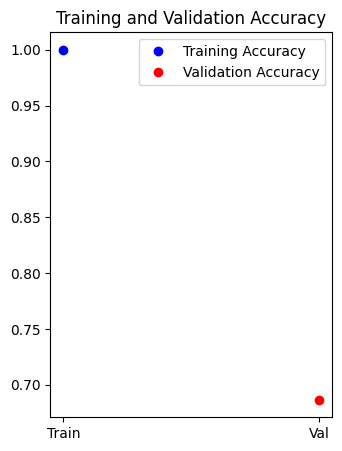

In [17]:
# Plotting results
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(['Train'], [train_accuracy], 'bo', label='Training Accuracy')
plt.plot(['Val'], [val_accuracy], 'ro', label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')